**BrightCon 2022**

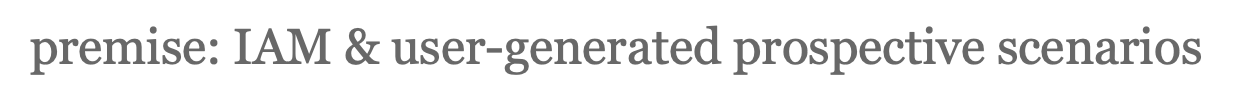

*September, 27<sup>th</sup>, 2022*\
Romain Sacchi

In [2]:
from premise import *
import bw2data, bw2calc, bw2io

In [2]:
RESET = True

if RESET:
    bw2io.restore_project_directory(
        "/srv/data/projects/premise-25-ecoinvent-3.8-cutoff.tar.gz", 
        overwrite_existing=True
    )
    bw2data.projects.set_current('premise-25-ecoinvent-3.8-cutoff')
    if "premise-user-scenarios" in bw2data.projects:
        bw2data.projects.delete_project("premise-user-scenarios", True)
    bw2data.projects.copy_project("premise-user-scenarios")        

Restoring project backup archive - this could take a few minutes...


In [3]:
bw2data.projects.set_current("premise-user-scenarios")

Fetch the external scenario of your choice, by referring to the url of its `datapackage.json` file.
For a list of publicly available scenarios, visit the [community scenarios repository](https://github.com/premise-community-scenarios).

In [4]:
from datapackage import Package
fp = "https://raw.githubusercontent.com/premise-community-scenarios/ammonia-prospective-scenarios/main/datapackage.json"
cobalt = Package(fp)

Choose the IAM scenarios to generate `premise` LCA databases from, as well as insert a list of user-defined scenarios to integrated as an `external_scenario` argument when instantiating `NewDatabase`. You can in theory provide several user-defined scenario to integrate at once. In practice, this has not yet been fully tested.

In [4]:
list(bw2data.Database)

[Brightway2 Database: biosphere3 (sqlite),
 Brightway2 Database: ecoinvent-3.8-cutoff (sqlite)]

In [6]:
ndb = NewDatabase(
    scenarios = [
        {"model":"image", "pathway":"SSP2-Base", "year":2040,}, # IAM model IMAGE, scenario "Business As Usual", year 2040
        {"model":"image", "pathway":"SSP2-Base", "year":2050,}, # IAM model IMAGE, scenario "Business As Usual", year 2050
    ],
    source_db="ecoinvent-3.8-cutoff", # name of the database in your BW2 project
    source_version="3.8",
    key='XXX', # decryption key. Ask romain.sacchi(at)psi.ch to get it.
    external_scenarios=[
        cobalt, # <-- list datapackages here
    ]
)
ndb.update_electricity()
ndb.update_external_scenario()

premise v.(1, 5, 1)
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
| It also provides factors for hydrogen emissions to air.          |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+------------------------------------------------------------------+
+-------------

In [7]:
ndb.write_superstructure_db_to_brightway("cobalt_w_electricity")

Prepare database 1.
- check for duplicates...
- check for values format...
- relinking exchanges...
Done!
Prepare database 2.
- check for duplicates...
- check for values format...
- relinking exchanges...
Done!
Building superstructure database...
Dropped 0 duplicate(s).
Scenario difference file exported to /home/jupyter-cmutel/from-the-ground-up/premise/export/scenario diff files!
Done!
Not able to determine geocollections for all datasets. This database is not ready for regionalization.
Title: Writing activities to SQLite3 database:
  Started: 06/09/2023 08:59:25
  Finished: 06/09/2023 08:59:26
  Total time elapsed: 00:00:00
  CPU %: 99.90
  Memory %: 2.56
Created database: cobalt_w_electricity
Starting IO table write
Adding technosphere matrix
Adding biosphere matrix
Finalizing serialization
Generate scenario report.
Report saved under /home/jupyter-cmutel/from-the-ground-up/premise/export/scenario_report.
Generate change report.
Report saved under /home/jupyter-cmutel/from-the-grou

[Documentation](https://premise.readthedocs.io/en/latest/) on `premise`, and [another examples notebook](https://github.com/polca/premise/blob/master/examples/examples.ipynb) are available. For any other matter or question, there is [a discussion group](https://groups.io/g/premise) for that purpose.

URL to a scenario on the future Swiss electricity, gas, diesel, gasoline and hydrogen mixes:
https://github.com/premise-community-scenarios/energy-perspective-2050-switzerland/blob/main/datapackage.json

URL to a scenario on the future supply of cobalt:
https://github.com/premise-community-scenarios/cobalt-perspective-2050/blob/main/datapackage.json

URL to a scenario on the future production of ammonia:
https://github.com/premise-community-scenarios/ammonia-prospective-scenarios/blob/main/datapackage.json